Connect to Google drive for this account

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1-Read file and split the data into training and testing**

In [3]:
import pandas as pd
import numpy as np

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment_2/IMDB Dataset.csv')

# Check the total number of rows (just for validation, you can skip this)
print(f"Total number of rows in the DataFrame: {len(df)}")

# Step 2: Split the DataFrame
# First 40,000 rows for training
train_df = df.iloc[:40000]

# Last 10,000 rows for testing
test_df = df.iloc[40000:50000]

# Now you have `train_df` for training and `test_df` for testing


Total number of rows in the DataFrame: 50000


**2-Preprocessing the data**

This is preprocessing done using NLTK and regex
I will try using the module with & without handling negation to see which is better.


In [4]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a list of negation words
negation_words = {'no', 'not', 'none', 'neither', 'never', 'nobody', 'nothing', 'nowhere', 'hardly', 'scarcely', 'barely', 'don’t', 'isn’t', 'wasn’t', 'shouldn’t', 'wouldn’t', 'couldn’t', 'won’t', 'can’t', 'doesn’t'}

def handle_negation(text_tokens):
    """
    Modifies tokens following negation words up to a punctuation or stop word.
    """
    negated = False
    result_tokens = []
    for word in text_tokens:
        if word in negation_words:
            negated = True
        elif word in stop_words or re.match(r'[.,!?;]', word):
            negated = False

        if negated:
            result_tokens.append(f"NOT_{word}")
        else:
            result_tokens.append(word)

    return result_tokens

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs and emails
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove non-alphabetic characters, preserve intra-word dashes
    text = re.sub(r'[^a-z\s-]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Handle negation
    tokens = handle_negation(tokens)
    # Remove stop words and apply lemmatization, skip negated tokens from stop word removal
    tokens = [lemmatizer.lemmatize(word) if not word.startswith("NOT_") else word for word in tokens if word not in stop_words or word.startswith("NOT_")]
    return ' '.join(tokens)

def preprocess_text_without_negation(text):
    # Lowercase
    text = text.lower()
    # Remove URLs and emails
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove non-alphabetic characters, preserve intra-word dashes
    text = re.sub(r'[^a-z\s-]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words and apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


The dataframes after pre-processing with & without negations

In [5]:
# Preprocessing with negation handling
train_df['review_with_negation'] = train_df['review'].apply(preprocess_text)
test_df['review_with_negation'] = test_df['review'].apply(preprocess_text)

# Preprocessing without negation handling
train_df['review_without_negation'] = train_df['review'].apply(preprocess_text_without_negation)
test_df['review_without_negation'] = test_df['review'].apply(preprocess_text_without_negation)

# Viewing the head of the dataframe for training with negatation
print(train_df[['review_with_negation', 'sentiment']].head(5))

# Viewing the head of the dataframe for training without negatation
print(train_df[['review_without_negation', 'sentiment']].head(5))

#Ignore the warnings as overwriting the dataframes is not intended.

<ipython-input-5-51f99de93be0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['review_with_negation'] = train_df['review'].apply(preprocess_text)
<ipython-input-5-51f99de93be0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['review_with_negation'] = test_df['review'].apply(preprocess_text)
<ipython-input-5-51f99de93be0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

                                review_with_negation sentiment
0  one reviewer mentioned watching oz episode you...  positive
1  wonderful little production br br filming tech...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically there family little boy jake think t...  negative
4  petter matteis love time money visually stunni...  positive
                             review_without_negation sentiment
0  one reviewer mentioned watching oz episode you...  positive
1  wonderful little production br br filming tech...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically there family little boy jake think t...  negative
4  petter matteis love time money visually stunni...  positive


<ipython-input-5-51f99de93be0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['review_without_negation'] = test_df['review'].apply(preprocess_text_without_negation)


Saving into new csv files for future access

In [ ]:
# Saving the training set with negation
train_df[['review_with_negation', 'sentiment']].to_csv('train_with_negation.csv', index=False)

# Saving the testing set with negation
test_df[['review_with_negation', 'sentiment']].to_csv('test_with_negation.csv', index=False)

# Saving the training set without negation
train_df[['review_without_negation', 'sentiment']].to_csv('train_without_negation.csv', index=False)

# Saving the testing set without negation
test_df[['review_without_negation', 'sentiment']].to_csv('test_without_negation.csv', index=False)


**3-Feature Analysis of the training set**


3.1-Text Statistics like average length of the words and sentences


In [9]:
from nltk.tokenize import word_tokenize, sent_tokenize
# instead of using list comprehension pd.apply() could be used and using lamda to calculate the actual sum and averages
# Using list comprehension for tokenization for training with negation
words_with_negation = [word_tokenize(review) for review in train_df['review_with_negation']]
sentences_with_negation = [sent_tokenize(review) for review in train_df['review_with_negation']]

# Using list comprehension for tokenization for training without negation
words_without_negation = [word_tokenize(review) for review in train_df['review_without_negation']]
sentences_without_negation = [sent_tokenize(review) for review in train_df['review_without_negation']]

# Calculating average word and sentence lengths (with negation)
average_word_length_with_negation = [sum(len(word) for word in review) / len(review) if review else 0 for review in words_with_negation]
average_sentence_length_with_negation = [sum(len(sent.split()) for sent in review) / len(review) if review else 0 for review in sentences_with_negation]

# Calculating mean values (with negation)
print(f"Average word length: {pd.Series(average_word_length_with_negation).mean()}")
print(f"Average sentence length: {pd.Series(average_sentence_length_with_negation).mean()}")

# Calculating average word and sentence lengths (without negation)
average_word_length_without_negation = [sum(len(word) for word in review) / len(review) if review else 0 for review in words_without_negation]
average_sentence_length_without_negation = [sum(len(sent.split()) for sent in review) / len(review) if review else 0 for review in sentences_without_negation]

# Calculating mean values (without negation)
print(f"Average word length: {pd.Series(average_word_length_without_negation).mean()}")
print(f"Average sentence length: {pd.Series(average_sentence_length_without_negation).mean()}")



Average word length: 5.876019956492645
Average sentence length: 123.810975
Average word length: 5.761928226042087
Average sentence length: 122.085125


Graph the statistical data


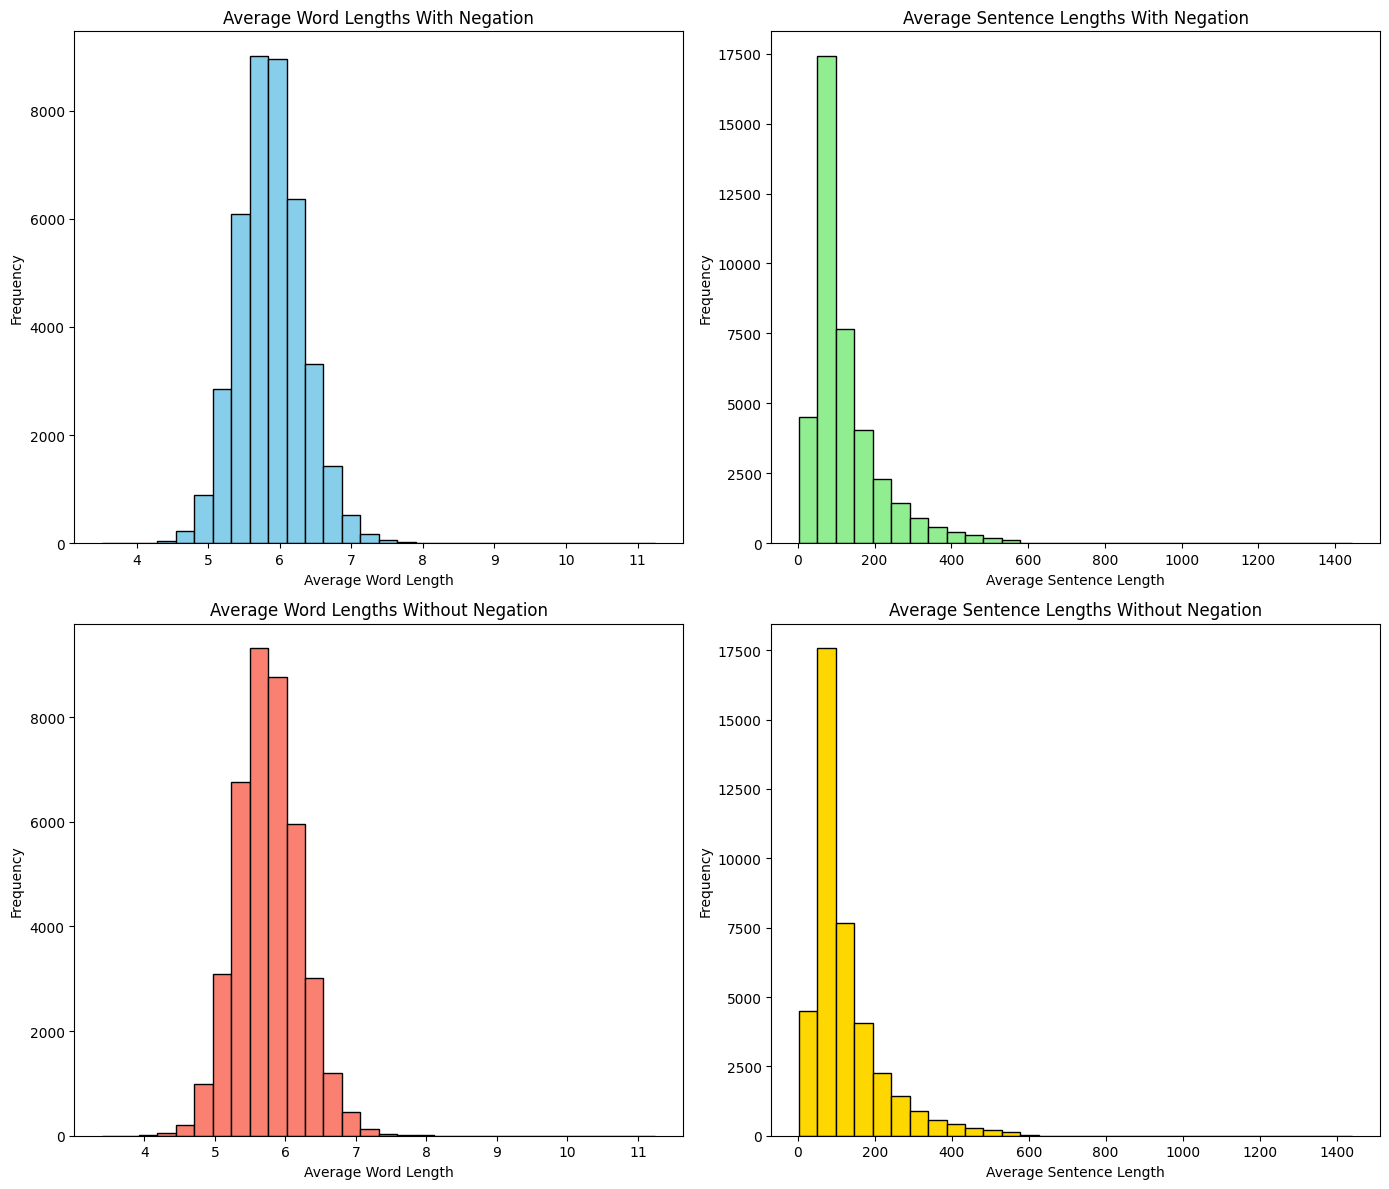

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to pandas Series for plotting
awln_series = pd.Series(average_word_length_with_negation)
asln_series = pd.Series(average_sentence_length_with_negation)
awln_series_without = pd.Series(average_word_length_without_negation)
asln_series_without = pd.Series(average_sentence_length_without_negation)

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Histogram of average word lengths (with negation)
ax[0, 0].hist(awln_series, bins=30, color='skyblue', edgecolor='black')
ax[0, 0].set_title('Average Word Lengths With Negation')
ax[0, 0].set_xlabel('Average Word Length')
ax[0, 0].set_ylabel('Frequency')

# Histogram of average sentence lengths (with negation)
ax[0, 1].hist(asln_series, bins=30, color='lightgreen', edgecolor='black')
ax[0, 1].set_title('Average Sentence Lengths With Negation')
ax[0, 1].set_xlabel('Average Sentence Length')
ax[0, 1].set_ylabel('Frequency')

# Histogram of average word lengths (without negation)
ax[1, 0].hist(awln_series_without, bins=30, color='salmon', edgecolor='black')
ax[1, 0].set_title('Average Word Lengths Without Negation')
ax[1, 0].set_xlabel('Average Word Length')
ax[1, 0].set_ylabel('Frequency')

# Histogram of average sentence lengths (without negation)
ax[1, 1].hist(asln_series_without, bins=30, color='gold', edgecolor='black')
ax[1, 1].set_title('Average Sentence Lengths Without Negation')
ax[1, 1].set_xlabel('Average Sentence Length')
ax[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**3.2-POS tagging**

In [10]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
# Flatten the lists and apply POS tagging
all_words_with_negation = [word for sublist in words_with_negation for word in sublist]
all_words_without_negation = [word for sublist in words_without_negation for word in sublist]

# Apply POS tagging
pos_tags_with_negation = pos_tag(all_words_with_negation)
pos_tags_without_negation = pos_tag(all_words_without_negation)

# Count the frequency of each part of speech
pos_counts_with_negation = pd.Series([tag for word, tag in pos_tags_with_negation]).value_counts()
pos_counts_without_negation = pd.Series([tag for word, tag in pos_tags_without_negation]).value_counts()

# Print the POS counts
print("POS counts with negation:")
print(pos_counts_with_negation)
print("\nPOS counts without negation:")
print(pos_counts_without_negation)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


POS counts with negation:
NN      2073481
JJ      1007033
RB       381329
VBG      202945
VBD      200542
NNP      183131
VBP      172105
VB       128714
VBN      112765
IN       105235
NNS      102417
CD        61304
VBZ       48936
MD        47017
JJS       24509
:         23757
JJR       16992
DT        14040
RBR       11442
FW         7259
PRP        6129
RP         3909
CC         3857
EX         2354
WP         2078
SYM        2043
RBS        1574
WP$        1526
WDT        1503
WRB         875
UH          854
TO          471
PRP$        279
NNPS         93
POS          68
PDT          34
''            5
$             4
LS            1
``            1
dtype: int64

POS counts without negation:
NN      2107191
JJ      1035613
RB       402456
VBG      206379
VBD      198632
VBP      176585
VB       131708
VBN      119663
IN       108138
NNS      104540
CD        63595
VBZ       48291
MD        47397
JJS       24399
:         24099
JJR       17498
DT        14523
RBR       12187
FW 

**POS graphs**

NameError: name 'plt' is not defined

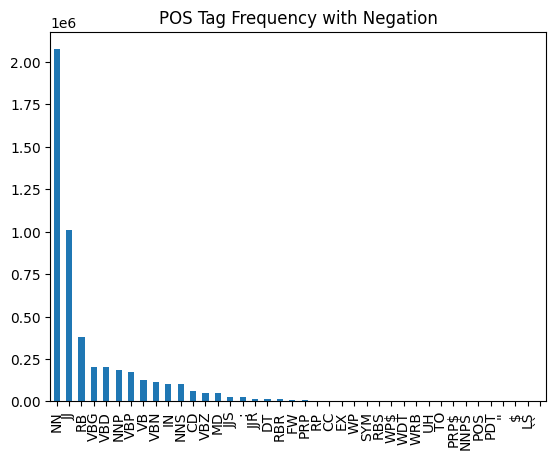

In [11]:
# Code to plot a bar graph for POS tags with negation
pos_counts_with_negation.plot(kind='bar', title='POS Tag Frequency with Negation')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.show()

Note that it's almost the same so I will be making graphs for just one dataset  from now on.

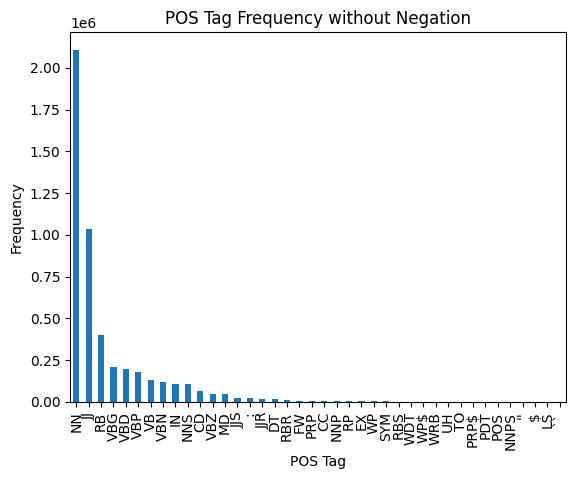

In [12]:
import matplotlib.pyplot as plt
# Example code to plot a bar graph for POS tags without negation
pos_counts_without_negation.plot(kind='bar', title='POS Tag Frequency without Negation')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.show()

Chart graph

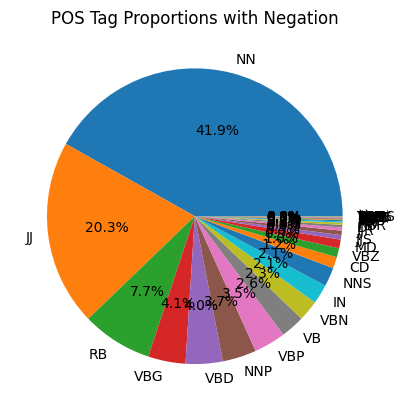

In [ ]:
# Example code to plot a pie chart for POS tags with negation
pos_counts_with_negation.plot(kind='pie', title='POS Tag Proportions with Negation', autopct='%1.1f%%')
plt.ylabel('')  # This removes the 'POS Tag' label on the y-axis
plt.show()


Word Clouds for 'JJ' adjectives, as adjective are better for sentiment

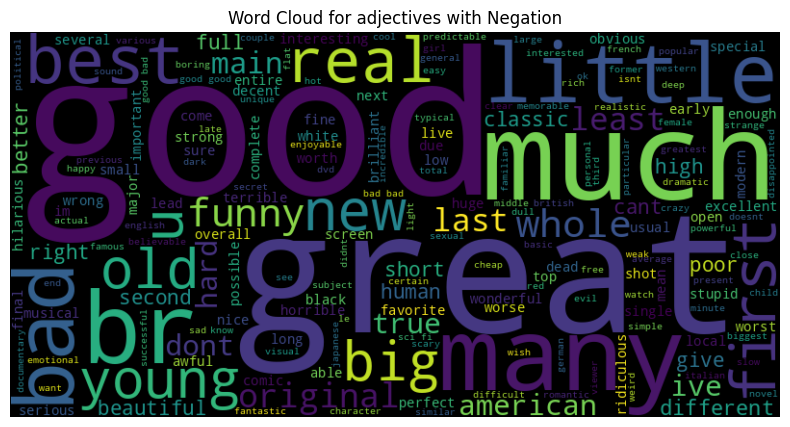

In [14]:
from wordcloud import WordCloud

# Example code to create a word cloud for nouns from POS tags with negation
adj_with_negation = [word for word, tag in pos_tags_with_negation if tag.startswith('JJ')]
wordcloud = WordCloud(width=800, height=400).generate(' '.join(adj_with_negation))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for adjectives with Negation')
plt.show()


Bar Chart of top adjectives

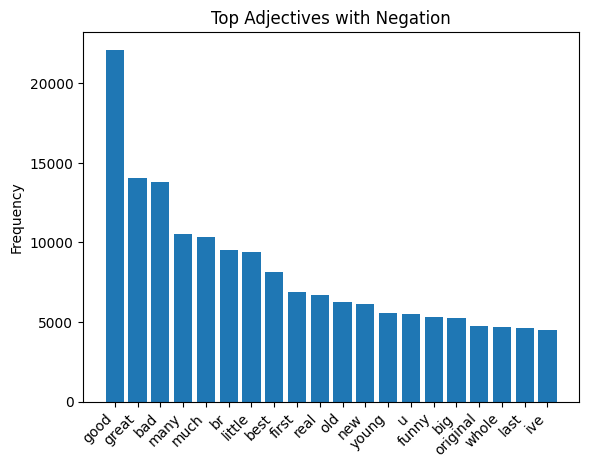

In [17]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the nouns
adj_counts = Counter(adj_with_negation)

# Get the most common adjectives and their counts
top_adj = adj_counts.most_common(20)

# Separate the nouns and their counts for plotting
nouns, counts = zip(*top_adj)

# Create a bar chart
plt.bar(nouns, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Top Adjectives with Negation')
plt.ylabel('Frequency')
plt.show()


Cumulative distribution plot


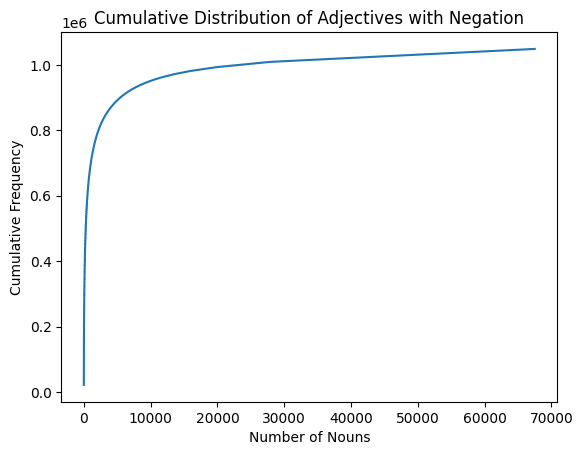

In [19]:
# Convert the counts to a Series for easy plotting
adj_counts_series = pd.Series(adj_counts)

# Create a cumulative distribution plot
adj_counts_series.sort_values(ascending=False).cumsum().reset_index(drop=True).plot(drawstyle='steps-pre')
plt.title('Cumulative Distribution of Adjectives with Negation')
plt.xlabel('Number of Nouns')
plt.ylabel('Cumulative Frequency')
plt.show()


**3.3- Most frequent words/bigrams**

In [ ]:
from nltk.probability import FreqDist
from nltk.util import ngrams

# Calculate frequency distribution for words
fdistwo = FreqDist(all_words_without_negation)

# Calculate frequency distribution for bigrams
bigrams = ngrams(all_words_without_negation, 2)
fdistwo_bigrams = FreqDist(bigrams)

print(fdistwo.most_common(10))  # Top 10 words
print(fdistwo_bigrams.most_common(10))  # Top 10 bigrams


[('br', 91794), ('movie', 79343), ('film', 71611), ('one', 42527), ('like', 31901), ('time', 23441), ('good', 23167), ('character', 21947), ('even', 19768), ('get', 19535)]
[(('br', 'br'), 11163), (('look', 'like'), 2298), (('br', 'film'), 2162), (('br', 'movie'), 2124), (('ever', 'seen'), 1995), (('ive', 'seen'), 1815), (('special', 'effect'), 1761), (('dont', 'know'), 1632), (('itbr', 'br'), 1598), (('even', 'though'), 1570)]


In [ ]:
# Calculate frequency distribution for words
fdist = FreqDist(all_words_with_negation)

# Calculate frequency distribution for bigrams
bigrams = ngrams(all_words_with_negation, 2)
fdist_bigrams = FreqDist(bigrams)

print(fdist.most_common(10))  # Top 10 words
print(fdist_bigrams.most_common(10))  # Top 10 bigrams


[('br', 89797), ('movie', 79083), ('film', 71421), ('NOT_not', 49576), ('one', 40339), ('like', 30881), ('time', 23238), ('good', 22620), ('character', 21664), ('NOT_no', 19458)]
[(('br', 'br'), 10916), (('look', 'like'), 2267), (('br', 'film'), 2110), (('br', 'movie'), 2049), (('ever', 'seen'), 1970), (('ive', 'seen'), 1785), (('special', 'effect'), 1712), (('movie', 'NOT_not'), 1677), (('dont', 'know'), 1630), (('even', 'though'), 1549)]
